<a href="https://colab.research.google.com/github/Jinwooseol/Deep-learning/blob/main/Model_%ED%95%99%EC%8A%B5_%EB%B0%8F_%EC%86%90%EC%8B%A4_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model의 학습


> **지도 학습 Vs. 비지도 학습**
  - **지도 학습 (Supervised Learning)**
    - 입력에 대한 정답 (Label, Ground Truth)이 존재
    - (입력 - 정답) 관계를 학습하여 새로운 입력에 대한 정답을 맞추는 과정
    - 따라서, 정답이 존재해야만 사용할 수 있음
  - **비지도 학습 (Unsupervised Learning)**
    - 정답이 존재하지 않음
    - 입력 data로부터 어떤 알고리즘을 통해 유용한 정도 (패턴 등)을 추출하는 과정 



#학습 매개변수(Trainable Parameter)
- 학습 시, 값이 변화하는 parameter
- 이 parameter에 따라 학습 알고리즘(모델)이 변화함
> (학습 모델: 입력에 따른 출력을 나타내는 수식)  
> Ex. Linear Regression  
>> $Y = aX + b$  
> $a, b$: 학습 매개변수
- 초기화된 모델로부터 학습이 진행되면서 학습 데이터에 맞는 모델로 학습 매개변수를 수정



#Hyper Parameter
- 직접 설정해야하는 매개변수
- 학습 전, 미리 설정 (상수 취급)  
    - 손실 함수 (Loss Function, Cost Function)
    - 학습률 (Learning Rate)
    - 학습 반복 횟수 (Epochs)
    - 미니 배치 크기 (Batch Size)
    - 은닉층의 노드 개수 (Units)
    - 노이즈 (Noise)
    - 규제화 (Regularization)
    - 가중치 초기화 (Weights Initialization)
- Neural Network의 parameter인 weights는 학습 알고리즘에 의해 **자동**으로 갱신

#손실 함수 (Loss Function, Cost Function)
- 학습이 잘 진행되고 있는지 판단하는 지표 (정답과 예측 결과의 차이)
- 손실 함수에 따른 결과를 통해 trainable parameter를 조정
- **최소화** 하는 것이 목표
- **미분 가능한 함수 사용**

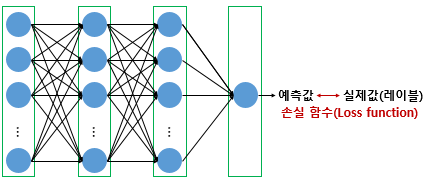

Reference: https://omicro03.medium.com/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-10%EC%9D%BC%EC%B0%A8-%EB%94%A5-%EB%9F%AC%EB%8B%9D%EC%9D%98-%ED%95%99%EC%8A%B5-%EB%B0%A9%EB%B2%95-27dae4be480d

#학습의 수학적 의미
- Loss function 값이 최소화되도록 한다.
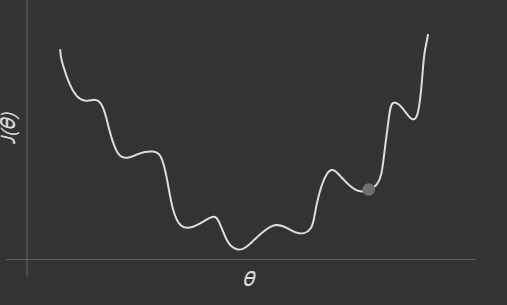

Reference: https://internalpointers.com/post/cost-function-logistic-regression

>> $\widetilde{\theta} = \underset{\theta}{argmin  L(x, y; \theta)}$
- L: 손실 함수
- x: 입력 값
- y: 데이터의 정답
- $θ$: 학습될 모든 parameters를 모은 벡터
- $\widetilde{\theta}$: 추정된 최적의 parameter
- 학습에 사용되는 파라미터(parameter, $i.g weights, bias, ...$)를 모두 통칭해서 $θ$로 표현, 최적의 $θ$를 찾는 것이 학습

- 따라서, 지도 학습 알고리즘에서 손실 함수는 **필수**

#One-hot encoding
- 범주형 변수를 표현
- 가변수(Dummy variable)이라고도 불림
- 정답인 label을 제외하고 0으로 처리
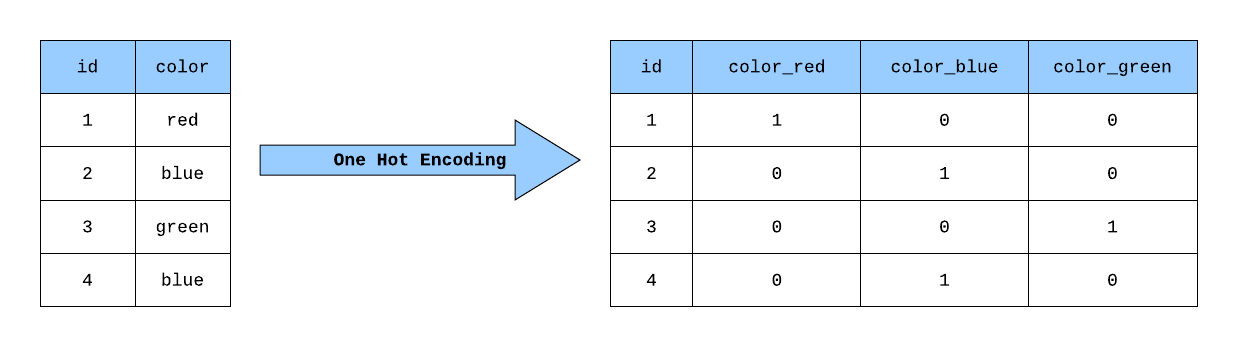

Reference: https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39

In [4]:
import numpy as np

#One-hot encoding
def convert_one_hot(labels, num_classes):
  one_hot_result = np.zeros((len(labels), num_classes))
  for idx, label in enumerate(labels):
    one_hot_result[idx][label] = 1
  
  return one_hot_result

In [2]:
x_label = [1, 3, 3, 4, 5, 6, 9, 0]
print(convert_one_hot(x_label, max(x_label)+1))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Using Keras

In [4]:
from keras.utils.np_utils import to_categorical

x_label = np.array([3, 5, 1, 5, 2, 6, 7])

#one-hot encoding function (to_categorical)
one_hot_label = to_categorical(x_label)
print(one_hot_label)

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


Using sklearn

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def convert_one_hot_sklearn(class_label):

  encoder = LabelEncoder()
  encoder.fit(class_label)
  labels = encoder.transform(class_label)
  labels = labels.reshape(-1, 1)

  one_hot_encoder = OneHotEncoder()
  one_hot_encoder.fit(labels)
  one_hot_encoder = one_hot_encoder.transform(labels)

  return one_hot_encoder.toarray()

In [6]:
marvel_labels = ['Iron man', 'Captain America', 'Spider man', 'Ant man', 'Hulk']
ohe = convert_one_hot_sklearn(marvel_labels)
print(ohe)
print("One hot encoder datatype:", type(ohe))
print("One hot encoder shape:", ohe.shape)
print("---------------------\n")

classes = [3, 2, 0, 1, 4, 1, 4, 3]
ohe = convert_one_hot_sklearn(classes)
print(ohe)
print("One hot encoder datatype:", type(ohe))
print("One hot encoder shape:", ohe.shape)

[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
One hot encoder datatype: <class 'numpy.ndarray'>
One hot encoder shape: (5, 5)
---------------------

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
One hot encoder datatype: <class 'numpy.ndarray'>
One hot encoder shape: (8, 5)


Using Pandas

In [8]:
import pandas as pd

df = pd.DataFrame({'labels': ['Iron man', 'Captain America', 'Spider man', 'Ant man', 'Hulk']})
ohe_df = pd.get_dummies(df['labels'])
ohe_df

,Ant man,Captain America,Hulk,Iron man,Spider man
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0


#평균절대오차 (Mean Absolute Error, MAE)
- 오차가 커져도 손실함수가 일정하게 증가
- 이상치(Outlier)에 Robust
  - 데이터에서 [입력 - 정답]관계가 적절하지 않은 것일 경우, 좋은 추정임에도 오차가 발생할 수 있음
  - 그 때, 해당 이상치에 해당하는 지점에서 손실 함수의 최소값으로 가는 정도의 영향을 받지 않음
- 중간값(Median)과 연관
- Regression에 많이 사용
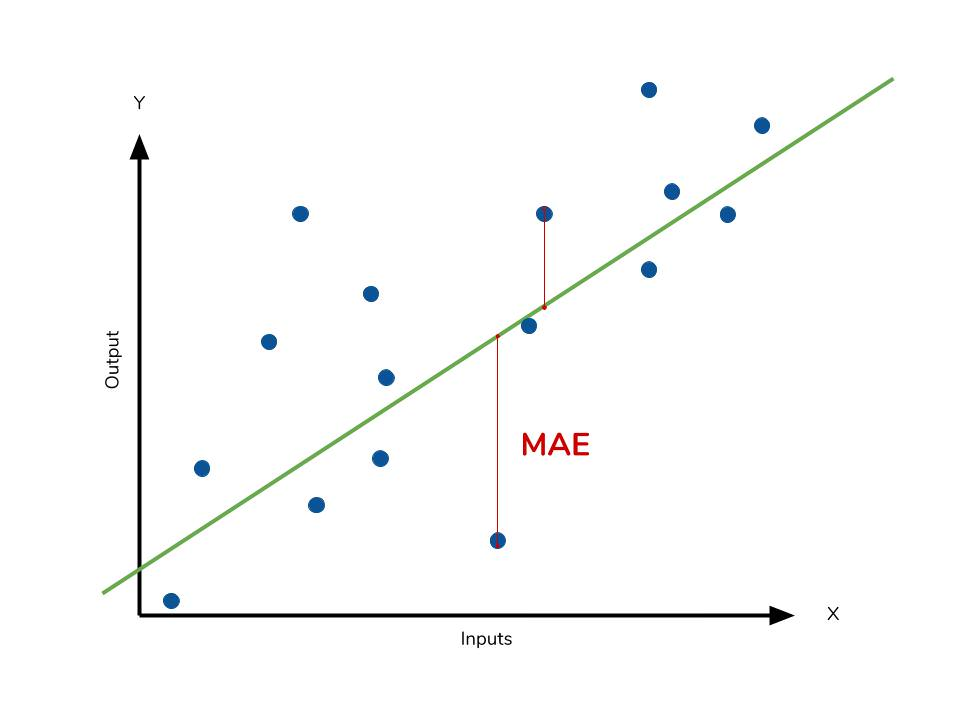

Reference: https://www.dataquest.io/blog/understanding-regression-error-metrics/

> $E = \frac{1}{n}\sum_{i=1}^{n}\left|y_i - \widetilde{y_i} \right|$
- $y_i$: 학습 데이터의 $i$번째 정답
- $\widetilde{y_i}$: 학습 데이터의 $i$번째 추정치

In [15]:
def MAE(y, pred_y):
  return np.mean(np.abs(y - pred_y))

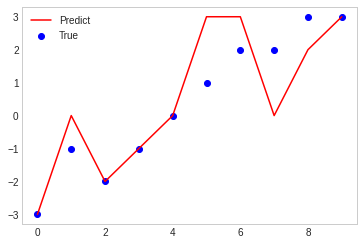

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

y = np.array([-3, -1, -2, -1, 0, 1, 2, 2, 3, 3]) # 정답
y_hat = np.array([-3, 0, -2, -1, 0, 3, 3, 0, 2, 3]) # 추정 값
x = list(range(len(y)))

plt.scatter(x, y, color='b', label='True')
plt.plot(x, y_hat, color='r', label='Predict')
plt.legend()
plt.grid()
plt.show()

In [25]:
print(MAE(y, y_hat))

0.7


#평균제곱오차(Mean Squared Error, MSE)
- 가장 많이 쓰이는 손실 함수 중 하나
- 오차가 커질수록 손실 함수가 빠르게 증가
  - 정답과 예측값의 차이가 클수록 더 많은 페널티를 부여
  - Regression에 사용

  > $E = \frac{1}{n}\sum_{i=1}^{n}(y_i - \widetilde{y_i})^2$
- $y_i$: 학습 데이터의 $i$번째 정답
- $\widetilde{y_i}$: 학습 데이터의 $i$번째 추정치

In [13]:
def MSE(y, pred_y):
  return np.mean(np.square(y - pred_y))

In [26]:
print(MSE(y, y_hat))

1.1


#손실함수로서의 MAE와 MSE
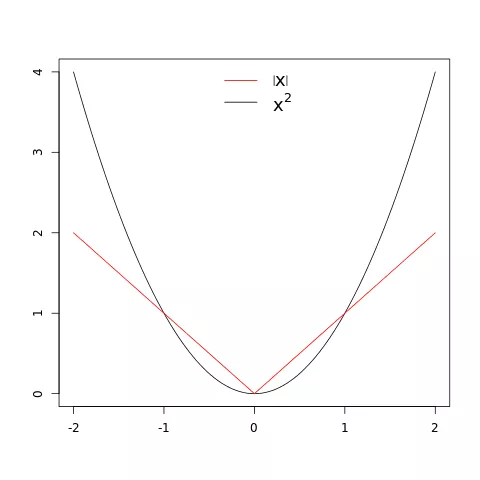

Reference: https://thedatascientist.com/performance-measures-rmse-mae/

#교차 엔트로피 오차(Cross Entropy Error, CEE)
- Binary Classification, Multi class Classification에서의 손실 함수로 사용
- Softmax와 One-hot encoding 사이의 출력 간 거리를 비교
- 정답인 class에 대해서만 오차를 계산  
  - 정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한히 증가  
  > $E = -\frac{1}{N}\Sigma_n\Sigma_i y_ilog\widetilde{y_i}$
  - $y_i$: 학습 데이터의 $i$번째 정답 (one-hot encoding)
  - $\widetilde{y_i}$: $i$번째 추정치
  - $N$: 전체 데이터의 수
  - $i$: 데이터 하나당 클래스 수

In [1]:
def CEE(y_pred, y_true):
  delta = 1e-7  # - infinity 방지
  return -np.sum(y_true * np.log(y_pred + delta))

In [6]:
y = np.array([0, 0, 0, 0, 1, 0, 0, 0])
yhat = np.array([0.01, 0.1, 0.05, 0.01, 0.7, 0.0, 0.03, 0.1])
print("yhat 합:", np.sum(yhat))
print(CEE(yhat, y))
print("---------------\n")
y = np.array([0, 0, 0, 0, 1, 0, 0, 0])
yhat = np.array([0.01, 0.1, 0.05, 0.7, 0.01, 0.0, 0.03, 0.1])
print("yhat 합:", np.sum(yhat))
print(CEE(yhat, y))

yhat 합: 1.0
0.3566748010815999
---------------

yhat 합: 1.0
4.605160186038091


#Binary Cross Entropy (BCE)
- 이진 분류 문제 (Binary Classification Problem)에서 cross entropy 오차를 손실 함수로 사용
  > $E = -\Sigma_{i=1}^2 y_ilog\widetilde{y_i}$  
  >$  = -y_1 log\widetilde{y_1} - (1 - y_1) log(1 - \widetilde{y_1})$
    $(\because y_2 = 1 - y_1)$
  - $y_i$: 학습 데이터의 $i$번째 정답 (one-hot encoding)
  - $\widetilde{y_i}$: $i$번째 추정치


In [7]:
y = np.array([0, 1])
yhat = np.array([0.15, 0.85])
print("yhat 합:", np.sum(yhat))
print(CEE(yhat, y))
print("------------\n")
y = np.array([1, 0])
yhat = np.array([0.15, 0.85])
print("yhat 합:", np.sum(yhat))
print(CEE(yhat, y))

yhat 합: 1.0
0.1625188118507231
------------

yhat 합: 1.0
1.8971193182194368
